<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-24/litao3EISBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install impedance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 389.9 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 792, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 792 (delta 52), reused 20 (delta 15), pack-reused 710
Receiving objects: 100% (792/792), 39.65 MiB | 7.22 MiB/s, done.
Resolving deltas: 100% (421/421), done.
Updating files: 100% (102/102), done.


'/content'

### 24-06-24 EIS on 2 gated samples of LiTaO3 : a blue and a black



In [4]:
%cd "/content/gator/data/06-24/"

/content/gator/data/06-24


In [5]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

### Blue sample : High to low

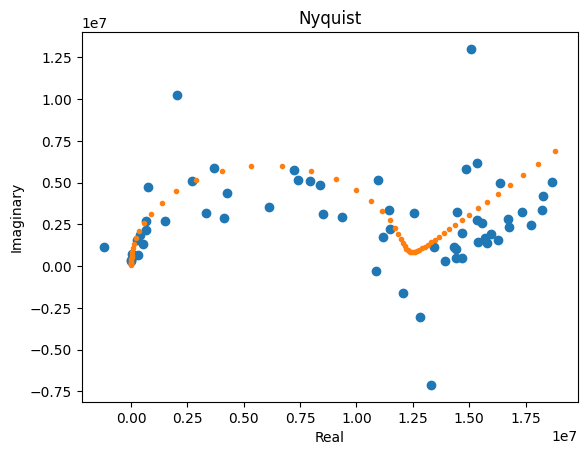

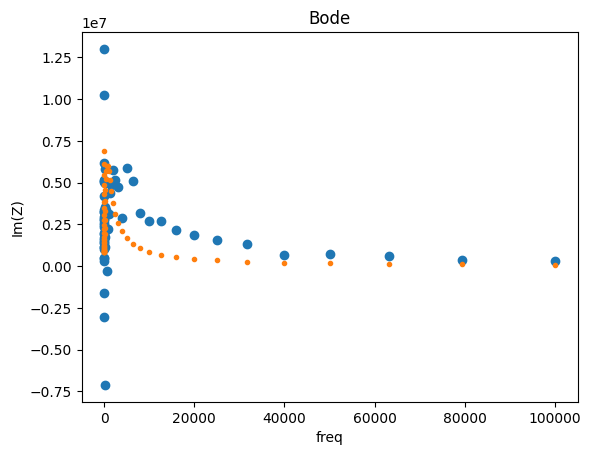

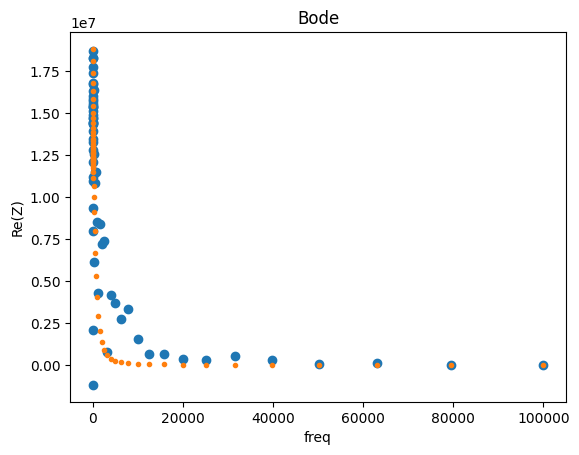

In [12]:
freqs, Z = preprocessing.readZPlot('LiTao3_Blue.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [13]:
print(circuit)


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.19e+07  (+/- 1.04e-24) [Ohm]
     W0 = 5.44e+06  (+/- 3.15e-25) [Ohm sec^-1/2]
     C0 = 1.86e-11  (+/- 7.09e-10) [F]



### Blue sample : Low to high

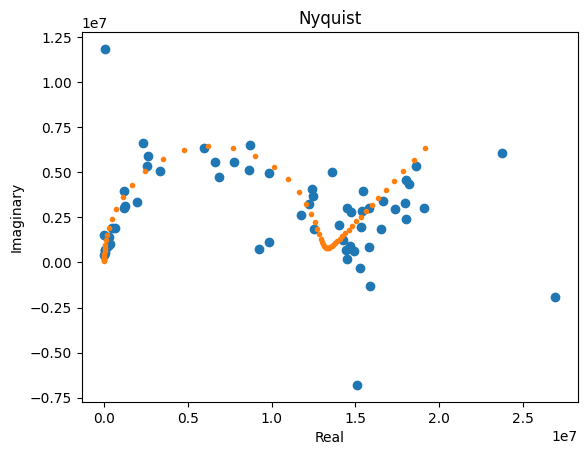

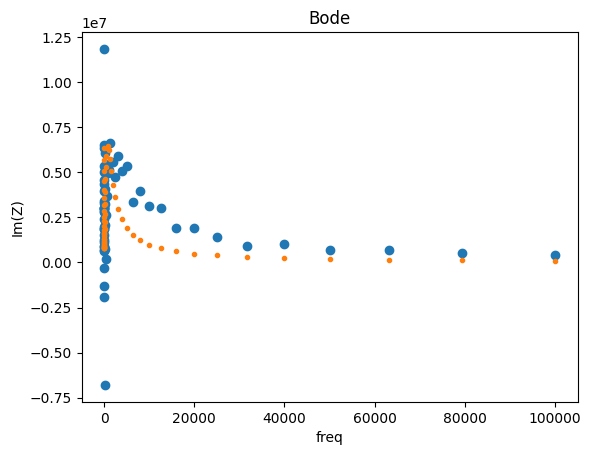

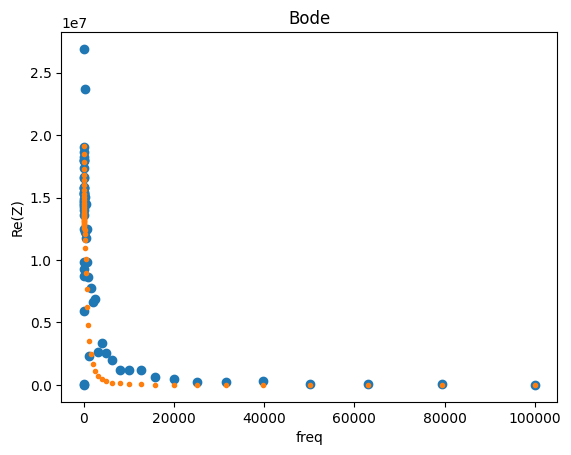

In [14]:
freqs, Z = preprocessing.readZPlot('LiTao3_Blueltoh.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [15]:
print(circuit)


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 1.28e+07  (+/- 9.89e-25) [Ohm]
     W0 = 5.04e+06  (+/- 3.20e-25) [Ohm sec^-1/2]
     C0 = 1.60e-11  (+/- 7.20e-10) [F]



### Black sample : High to low

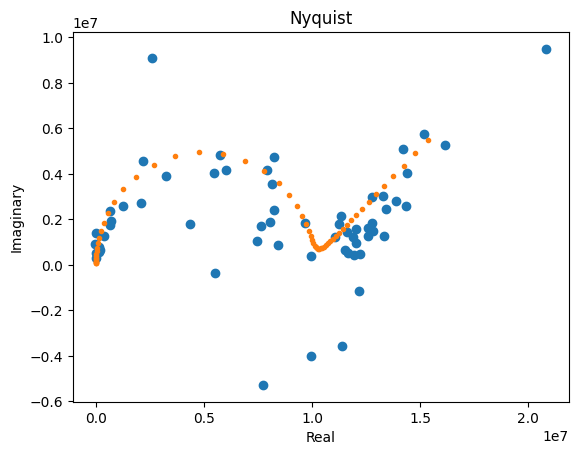

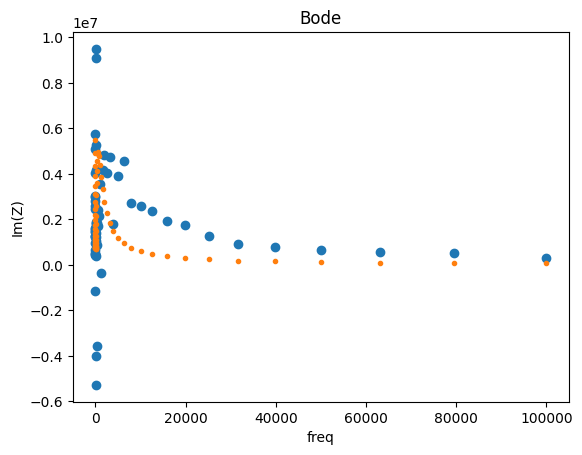

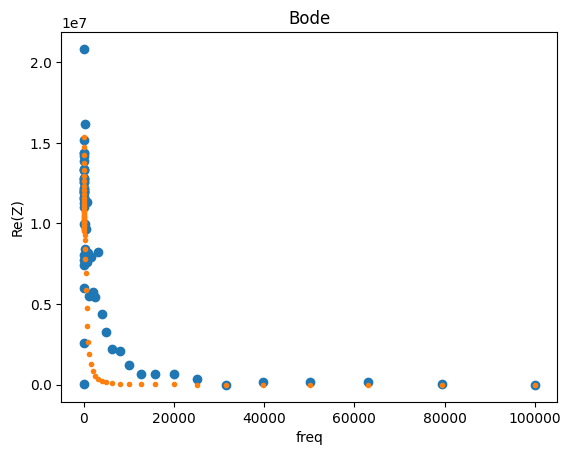


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 9.87e+06  (+/- 1.54e-24) [Ohm]
     W0 = 4.35e+06  (+/- 5.52e-25) [Ohm sec^-1/2]
     C0 = 2.63e-11  (+/- 8.29e-10) [F]



In [17]:
freqs, Z = preprocessing.readZPlot('LiTao3_Blackhtol.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

print(circuit)

### Black sample : Low to high

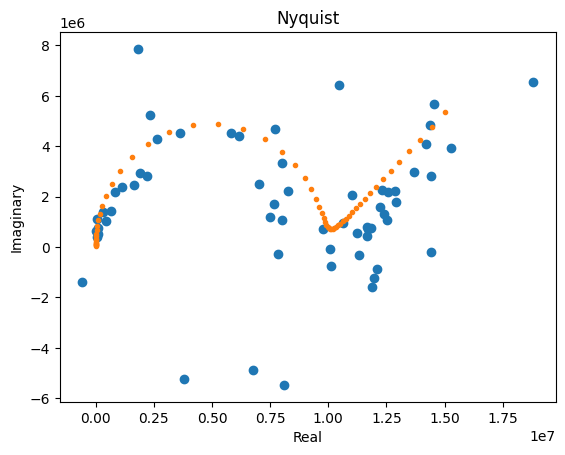

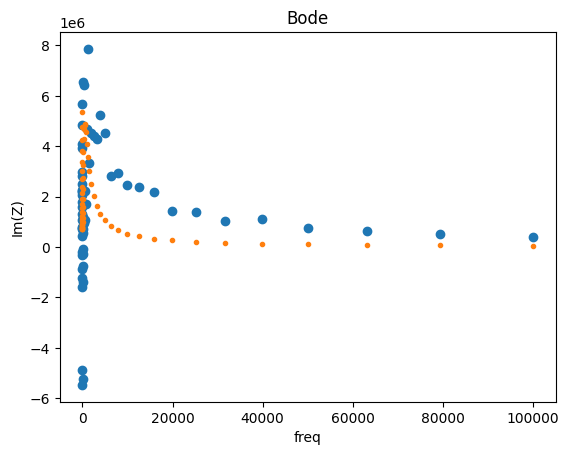

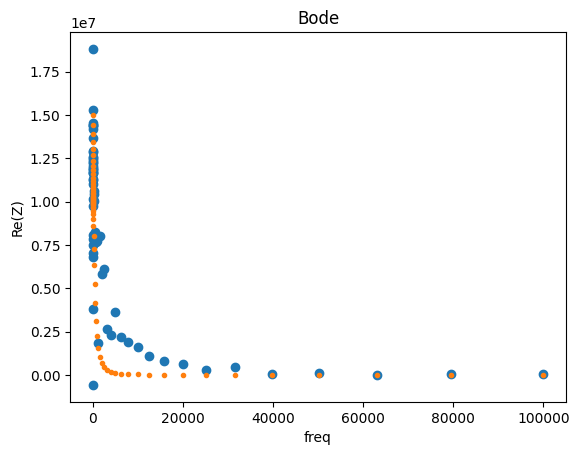


Circuit string: p(R0-W0,C0)
Fit: True

Initial guesses:
     R0 = 1.00e+06 [Ohm]
     W0 = 1.00e-07 [Ohm sec^-1/2]
     C0 = 1.00e-08 [F]

Fit parameters:
     R0 = 9.69e+06  (+/- 1.47e-24) [Ohm]
     W0 = 4.24e+06  (+/- 5.13e-25) [Ohm sec^-1/2]
     C0 = 2.98e-11  (+/- 7.69e-10) [F]



In [18]:
freqs, Z = preprocessing.readZPlot('LiTao3_Blackltoh.z')

circuit = 'p(R0-W0,C0)'
init = [10**6, 10**-7, 10**-8]

circuit = CustomCircuit(circuit, initial_guess=init)
circuit.fit(freqs, Z)
Z_fit = circuit.predict(freqs)

plt.plot(Z.real, -Z.imag, 'o')
plt.plot(Z_fit.real, -Z_fit.imag, '.')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.plot(freqs, -Z_fit.imag, '.')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

plt.plot(freqs, Z.real, 'o')
plt.plot(freqs, Z_fit.real, '.')
plt.ylabel('Re(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

print(circuit)

We can see a semi-circle and a 45° slope, which is characteristic of de Warburg diffusion